In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix
import matplotlib.pyplot as plt
from keras.datasets import mnist





In [11]:
import sys, os
sys.path.append(os.path.abspath(".."))
from lib3.layers import Layer_Dense
from lib3.activations import Activation_Tanh, Activation_Sigmoid
from lib3.losses import Loss_MSE
from lib3.optimizer import SGD

In [10]:
#enc
enc1 = Layer_Dense(784, 128)
act1 = Activation_Tanh()
enc2 = Layer_Dense(128, 64)
act2 = Activation_Tanh()

def encoding(input_data):
    enc1_output = enc1.forward(input_data)
    act1_output = act1.forward(enc1_output)
    enc2_output = enc2.forward(act1_output)
    act2_output = act2.forward(enc2_output)

    return act2_output


In [ ]:
#dec
dec1 = Layer_Dense(64, 128)
act3 = Activation_Tanh()
dec2 = Layer_Dense(128, 784)
act4 = Activation_Sigmoid()


def decoding(encoded_data):
    dec1_output = dec1.forward(encoded_data)
    act3_output = act3.forward(dec1_output)
    dec2_output = dec2.forward(act3_output)
    act4_output = act4.forward(dec2_output)

    return act4_output


In [ ]:
def autoencoding (inputdata):
    encoded_data = encoding(inputdata)
    decoded_data = decoding(encoded_data)
    return decoded_data

def autoencoding_train(inputdata):
    sgd_optimizer = SGD(learning_rate=0.1)
    loss_function = Loss_MSE()
    loss_history = []
    for epoch in range(100):
        # Forward pass
        encoded_data = encoding(inputdata)
        decoded_data = decoding(encoded_data)

        # Compute loss

        loss = loss_function.forward(decoded_data, inputdata)
        loss_history.append(loss)
        print(f'Epoch {epoch+1}, Loss: {loss}')

        # Backward pass
        dloss = loss_function.backward(decoded_data, inputdata)
        dact4 = act4.backward(dloss)
        ddec2 = dec2.backward(dact4)
        dact3 = act3.backward(ddec2)
        ddec1 = dec1.backward(dact3)
        dact2 = act2.backward(ddec1)
        denc2 = enc2.backward(dact2)
        dact1 = act1.backward(denc2)
        denc1 = enc1.backward(dact1)


        # Update weights and biases

        sgd_optimizer.update_params([enc1, enc2, dec1, dec2])

    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

    no_images = 10
    original_images = inputdata[:no_images]
    reconstructed_images = autoencoding(original_images)
    plt.figure(figsize=(20, 4))

    for i in range(no_images):
        # Original
        ax = plt.subplot(2, no_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap="gray")
        plt.title("Original")
        plt.axis("off")

        # Reconstructed
        ax = plt.subplot(2, no_images, i + 1 + no_images)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
        plt.title("Reconstructed")
        plt.axis("off")

    plt.suptitle("Original vs Reconstructed MNIST Images", fontsize=16)
    plt.show()



Training a simple neural network to learn the MNIST digitals.
Epoch 1, Loss: 0.2247855092395515
Epoch 2, Loss: 0.22466159637057856
Epoch 3, Loss: 0.22453758480756178
Epoch 4, Loss: 0.22441347208694504
Epoch 5, Loss: 0.2242892557953286
Epoch 6, Loss: 0.22416493356902076
Epoch 7, Loss: 0.224040503093589
Epoch 8, Loss: 0.223915962103412
Epoch 9, Loss: 0.2237913083812309
Epoch 10, Loss: 0.22366653975770062
Epoch 11, Loss: 0.22354165411094182
Epoch 12, Loss: 0.2234166493660923
Epoch 13, Loss: 0.2232915234948588
Epoch 14, Loss: 0.22316627451506935
Epoch 15, Loss: 0.22304090049022504
Epoch 16, Loss: 0.22291539952905282
Epoch 17, Loss: 0.22278976978505824
Epoch 18, Loss: 0.22266400945607864
Epoch 19, Loss: 0.2225381167838366
Epoch 20, Loss: 0.22241209005349438
Epoch 21, Loss: 0.22228592759320778
Epoch 22, Loss: 0.22215962777368223
Epoch 23, Loss: 0.22203318900772745
Epoch 24, Loss: 0.2219066097498147
Epoch 25, Loss: 0.22177988849563335
Epoch 26, Loss: 0.2216530237816491
Epoch 27, Loss: 0.22152

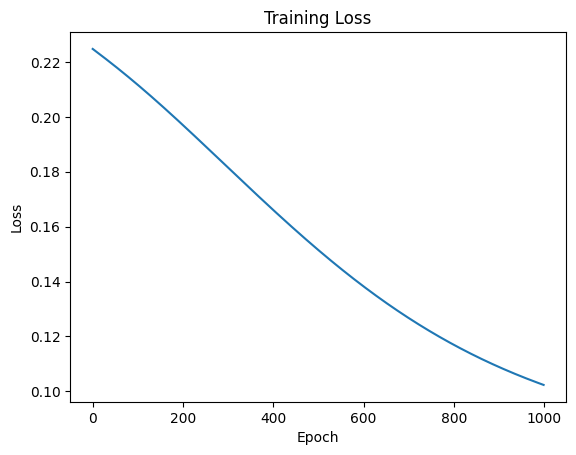

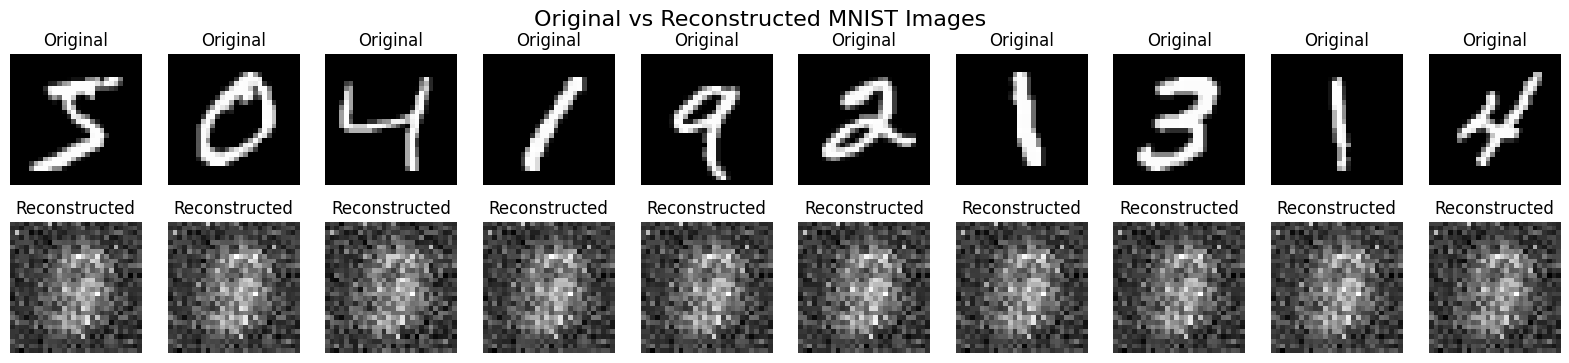

Latent space shapes:
Train: (60000, 64)
Test: (10000, 64)
SVC model trained on encoded data.
Predictions on test data: [7 2 1 ... 4 9 6]
Accuracy: 0.8214
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       980
           1       0.92      0.96      0.94      1135
           2       0.84      0.80      0.82      1032
           3       0.78      0.78      0.78      1010
           4       0.82      0.81      0.81       982
           5       0.77      0.67      0.72       892
           6       0.85      0.90      0.88       958
           7       0.85      0.81      0.83      1028
           8       0.70      0.73      0.72       974
           9       0.77      0.80      0.78      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Confusion Matrix:
 [[ 889    0    4    7    6   21   33    3   

In [23]:
def main():

    print("Training a simple neural network to learn the MNIST digitals.")

    # MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
    x_test  = x_test.reshape(-1, 784).astype('float32') / 255.0

    y_train = y_train.reshape(-1, 1)
    y_test  = y_test.reshape(-1, 1)

    autoencoding_train(x_train)
    encoded_data = encoding(x_train)
    encoded_test_data = encoding(x_test)
    
    print("Latent space shapes:")
    print("Train:", encoded_data.shape)
    print("Test:", encoded_test_data.shape)

    pred = SVC(kernel='rbf')
    pred.fit(encoded_data, y_train.ravel())
    print("SVC model trained on encoded data.")

    pred = pred.predict(encoded_test_data)
    print("Predictions on test data:", pred)
    print("Accuracy:", accuracy_score(y_test.ravel(), pred))
    print("Classification Report:\n", classification_report(y_test.ravel(), pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test.ravel(), pred))
    


if __name__ == "__main__":
    main()
    


In [19]:
# XOR dataset
XOR_input = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=float)
XOR_output = np.array([[0], [1], [1], [0]], dtype=float)


xor_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

xor_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

xor_model.fit(XOR_input, XOR_output, epochs=1000)
xor_model.evaluate(XOR_input, XOR_output)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8069
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.8060
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.8050
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.8041
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.8032
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.8023
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.8014
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.8005
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.7996
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.7987
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 0.7978
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0

[0.6776620149612427, 0.5]

In [ ]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 784).astype('float32') / 255.0

autoencoder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', ),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True)
reconstructed = autoencoder.predict(x_test)
autoencoder.evaluate(x_test, x_test)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0913
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0263
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0177
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0143
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0122
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0109
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0100
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0092
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0088
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0083
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0079


0.007636965252459049